# K-Means Clustering

## Importing the libraries

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [23]:
dataset = pd.read_csv('Mall_Customers.csv')

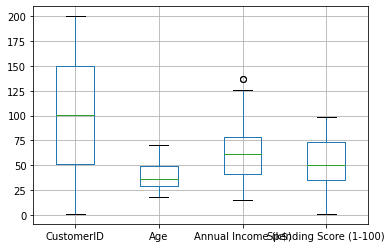

In [24]:
dataset.boxplot()

In [25]:
X = dataset.iloc[:, [2,4]].values
print(X)

[[19 39]
 [21 81]
 [20  6]
 [23 77]
 [31 40]
 [22 76]
 [35  6]
 [23 94]
 [64  3]
 [30 72]
 [67 14]
 [35 99]
 [58 15]
 [24 77]
 [37 13]
 [22 79]
 [35 35]
 [20 66]
 [52 29]
 [35 98]
 [35 35]
 [25 73]
 [46  5]
 [31 73]
 [54 14]
 [29 82]
 [45 32]
 [35 61]
 [40 31]
 [23 87]
 [60  4]
 [21 73]
 [53  4]
 [18 92]
 [49 14]
 [21 81]
 [42 17]
 [30 73]
 [36 26]
 [20 75]
 [65 35]
 [24 92]
 [48 36]
 [31 61]
 [49 28]
 [24 65]
 [50 55]
 [27 47]
 [29 42]
 [31 42]
 [49 52]
 [33 60]
 [31 54]
 [59 60]
 [50 45]
 [47 41]
 [51 50]
 [69 46]
 [27 51]
 [53 46]
 [70 56]
 [19 55]
 [67 52]
 [54 59]
 [63 51]
 [18 59]
 [43 50]
 [68 48]
 [19 59]
 [32 47]
 [70 55]
 [47 42]
 [60 49]
 [60 56]
 [59 47]
 [26 54]
 [45 53]
 [40 48]
 [23 52]
 [49 42]
 [57 51]
 [38 55]
 [67 41]
 [46 44]
 [21 57]
 [48 46]
 [55 58]
 [22 55]
 [34 60]
 [50 46]
 [68 55]
 [18 41]
 [48 49]
 [40 40]
 [32 42]
 [24 52]
 [47 47]
 [27 50]
 [48 42]
 [20 49]
 [23 41]
 [49 48]
 [67 59]
 [26 55]
 [49 56]
 [21 42]
 [66 50]
 [54 46]
 [68 43]
 [66 48]
 [65 52]
 

## Using the elbow method to find the optimal number of clusters

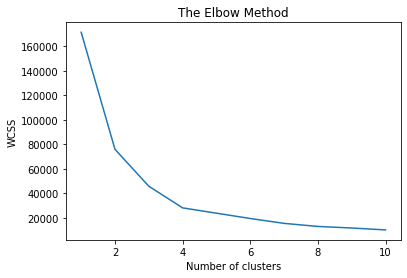

In [26]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## Training the K-Means model on the dataset

In [28]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 0)
y_kmeans1 = kmeans.fit_predict(X)
print(y_kmeans1)

[2 1 0 1 2 1 0 1 0 1 0 1 0 1 0 1 2 2 0 1 2 1 0 1 0 1 0 2 0 1 0 1 0 1 0 1 0
 1 0 1 3 1 3 2 0 2 3 2 2 2 3 2 2 3 3 3 3 3 2 3 3 2 3 3 3 2 3 3 2 2 3 3 3 3
 3 2 3 2 2 3 3 2 3 3 2 3 3 2 2 3 3 2 3 2 2 2 3 2 3 2 2 3 3 2 3 2 3 3 3 3 3
 2 2 2 2 2 3 3 3 3 2 2 2 1 2 1 3 1 0 1 0 1 2 1 0 1 0 1 0 1 0 1 2 1 0 1 3 1
 0 1 0 1 0 1 0 1 0 1 0 1 3 1 0 1 0 1 0 1 0 2 0 1 0 1 0 1 0 1 0 1 0 1 0 1 2
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1]


     CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)  \
0             1    Male   19                  15                      39   
1             2    Male   21                  15                      81   
2             3  Female   20                  16                       6   
3             4  Female   23                  16                      77   
4             5  Female   31                  17                      40   
..          ...     ...  ...                 ...                     ...   
195         196  Female   35                 120                      79   
196         197  Female   45                 126                      28   
197         198    Male   32                 126                      74   
198         199    Male   32                 137                      18   
199         200    Male   30                 137                      83   

     Cluster Number  
0                 2  
1                 1  
2                 0  

## Visualising the clusters

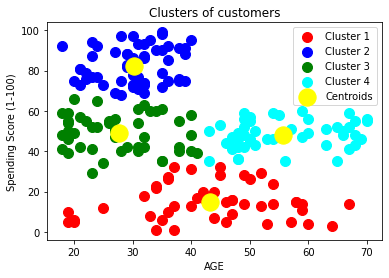

In [29]:
plt.scatter(X[y_kmeans1 == 0, 0], X[y_kmeans1 == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans1 == 1, 0], X[y_kmeans1 == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans1 == 2, 0], X[y_kmeans1 == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans1 == 3, 0], X[y_kmeans1 == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('AGE')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [31]:
dataset['Cluster Number'] = y_kmeans1
print(dataset)

     CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)  \
0             1    Male   19                  15                      39   
1             2    Male   21                  15                      81   
2             3  Female   20                  16                       6   
3             4  Female   23                  16                      77   
4             5  Female   31                  17                      40   
..          ...     ...  ...                 ...                     ...   
195         196  Female   35                 120                      79   
196         197  Female   45                 126                      28   
197         198    Male   32                 126                      74   
198         199    Male   32                 137                      18   
199         200    Male   30                 137                      83   

     Cluster Number  
0                 2  
1                 1  
2                 0  

In [34]:
dataset.drop(columns=['CustomerID', 'Annual Income (k$)'], axis=1)

,Genre,Age,Spending Score (1-100),Cluster Number
0,Male,19,39,2
1,Male,21,81,1
2,Female,20,6,0
3,Female,23,77,1
4,Female,31,40,2
...,...,...,...,...
195,Female,35,79,1
196,Female,45,28,0
197,Male,32,74,1
198,Male,32,18,0


In [41]:
newds = dataset.sort_values(by=['Cluster Number'])

In [42]:
print(newds)

     CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)  \
178         179    Male   59                  93                      14   
30           31    Male   60                  30                       4   
32           33    Male   53                  33                       4   
164         165    Male   50                  85                      26   
144         145    Male   25                  77                      12   
..          ...     ...  ...                 ...                     ...   
67           68  Female   68                  48                      48   
66           67  Female   43                  48                      50   
63           64  Female   54                  47                      59   
74           75    Male   59                  54                      47   
76           77  Female   45                  54                      53   

     Cluster Number  
178               0  
30                0  
32                0  

In [44]:
newds = newds.drop(columns=['CustomerID', 'Annual Income (k$)'], axis=1)

In [45]:
print(newds)

      Genre  Age  Spending Score (1-100)  Cluster Number
178    Male   59                      14               0
30     Male   60                       4               0
32     Male   53                       4               0
164    Male   50                      26               0
144    Male   25                      12               0
..      ...  ...                     ...             ...
67   Female   68                      48               3
66   Female   43                      50               3
63   Female   54                      59               3
74     Male   59                      47               3
76   Female   45                      53               3

[200 rows x 4 columns]
